In [308]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

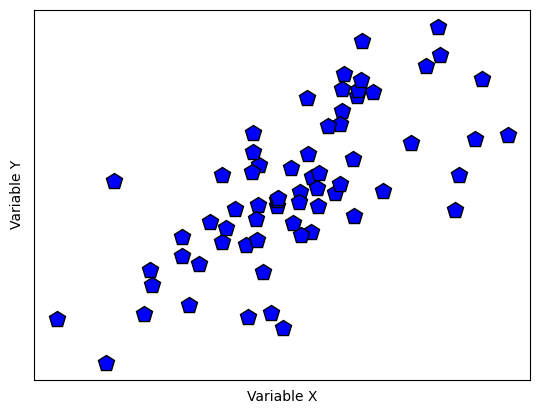

In [392]:
N = 66

x = np.random.randn(N)
y = x + np.random.randn(N)

plt.plot(x, y, 'kp', markerfacecolor='b', markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])

plt.show()

In [393]:
mean_x = np.mean(x)
mean_y = np.mean(y)

covar_1 = np.sum((x - mean_x) * (y - mean_y)) / (N - 1)

x_cent = x - mean_x
y_cent = y - mean_y

covar_2 = np.dot(x_cent, y_cent) / (N - 1)

covar_3 = np.cov(np.vstack((x, y)))

print(covar_1)
print(covar_2)
print(covar_3)

0.9535300637625319
0.9535300637625319
[[0.78725093 0.95353006]
 [0.95353006 2.3702199 ]]


In [394]:
corr_num = np.sum((x - mean_x) * (y - mean_y))
corr_den = np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2)
corr_1 = corr_num / np.sqrt(corr_den)

corr_2 = np.corrcoef(np.vstack((x, y)))

print(corr_1)
print(corr_2)

0.6980450920068358
[[1.         0.69804509]
 [0.69804509 1.        ]]


In [395]:
x_n = stats.zscore(x, ddof=1)
y_n = stats.zscore(y, ddof=1)

corr_3 = np.dot(x_n, y_n) / (N - 1)

print(corr_3)
print(np.corrcoef(np.vstack((x_n, y_n))))

0.6980450920068358
[[1.         0.69804509]
 [0.69804509 1.        ]]


/tmp/ipykernel_10539/3378691031.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  t_matrix[r_i, n_i] = -num / den
/tmp/ipykernel_10539/3378691031.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  p_matrix[r_i, n_i] = 1 - stats.t.cdf(np.abs(num / den), n[n_i] - 2)


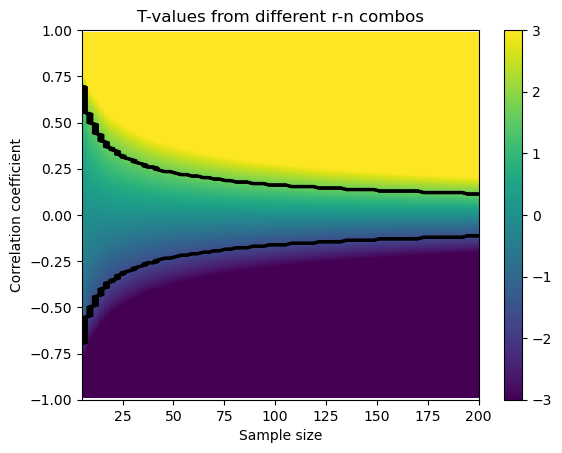

In [396]:
r = np.linspace(-1, 1, 248)
n = np.round(np.linspace(5, 200, 73))

t_matrix = np.zeros((len(r), len(n)))
p_matrix = np.zeros((len(r), len(n)))

for r_i in range(len(r)):
    for n_i in range(len(n)):
        
        num = r[r_i] * np.sqrt(n[n_i] - 2)
        den = 1 - r[r_i] ** 2
        
        t_matrix[r_i, n_i] = -num / den
        p_matrix[r_i, n_i] = 1 - stats.t.cdf(np.abs(num / den), n[n_i] - 2)

plt.imshow(t_matrix, vmin=-3, vmax=3, extent=[n[0], n[-1], r[0], r[-1]], aspect='auto')
plt.colorbar()
plt.contour(p_matrix < 0.05, colors='k', extent=[n[0], n[-1], r[0], r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')

plt.show()

In [397]:
r, p = stats.pearsonr(x, y)
print(r, p)

0.698045092006836 7.296532038405941e-11
